In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

TensorFlow 2.x selected.
Tensorflow version 2.1.0
Running on TPU  ['10.2.85.146:8470']
INFO:tensorflow:Initializing the TPU system: 10.2.85.146:8470


INFO:tensorflow:Initializing the TPU system: 10.2.85.146:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
 cd /content/gdrive/My\ Drive/Upwork/WireDetection/pyWireDetect

/content/gdrive/My Drive/Upwork/WireDetection/pyWireDetect


In [5]:
from glob import glob 

BUCKET='tfalldata' # @param
TFIDEN='WireDTF'  # @param
IMG_DIM=256 # @param
NB_CHANNEL=3 # @param
BATCH_SIZE=128 # @param
BUFFER_SIZE=1024 # @param
TRAIN_DATA=13*1024 # @param
EVAL_DATA=3*1024 # @param
EPOCHS=250 # @param

TOTAL_DATA=TRAIN_DATA+EVAL_DATA

STEPS_PER_EPOCH = TOTAL_DATA//BATCH_SIZE
EVAL_STEPS      = EVAL_DATA//BATCH_SIZE

GCS_PATH='gs://{}/{}'.format(BUCKET,TFIDEN)
print(GCS_PATH)

gs://tfalldata/WireDTF


In [8]:
import os 
def data_input_fn(mode,BUFFER_SIZE,BATCH_SIZE,img_dim=256): 
    
    def _parser(example):
        feature ={  'image'  : tf.io.FixedLenFeature([],tf.string) ,
                    'target' : tf.io.FixedLenFeature([],tf.string)
        }    
        parsed_example=tf.io.parse_single_example(example,feature)
        image_raw=parsed_example['image']
        image=tf.image.decode_png(image_raw,channels=3)
        image=tf.cast(image,tf.float32)/255.0
        image=tf.reshape(image,(img_dim,img_dim,3))
        
        target_raw=parsed_example['target']
        target=tf.image.decode_png(target_raw,channels=1)
        target=tf.cast(target,tf.float32)/255.0
        target=tf.reshape(target,(img_dim,img_dim,1))
        
        return image,target
    gcs_pattern=os.path.join(GCS_PATH,mode,'*.tfrecord')
    file_paths = tf.io.gfile.glob(gcs_pattern)
    dataset = tf.data.TFRecordDataset(file_paths)
    dataset = dataset.map(_parser)
    dataset = dataset.shuffle(BUFFER_SIZE,reshuffle_each_iteration=True)
    dataset = dataset.repeat()
    dataset = dataset.batch(BATCH_SIZE,drop_remainder=True)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset
eval_ds = data_input_fn("Eval",BUFFER_SIZE,BATCH_SIZE,img_dim=256)
train_ds = data_input_fn("Train",BUFFER_SIZE,BATCH_SIZE,img_dim=256)
for x,y in eval_ds.take(1):
  print(x.shape)
  print(y.shape)

(128, 256, 256, 3)
(128, 256, 256, 1)


In [9]:
from coreLib.efficient_unet import EfficientUNetB7
def ssim(y_true, y_pred):
  return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

with tpu_strategy.scope():
  model=EfficientUNetB7((256,256,3))
  model.compile(optimizer="Adam",
                loss=tf.keras.losses.mean_squared_error, 
                metrics=[ssim])
model.summary()





Model: "efficientnet-b7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 128, 128, 64) 1728        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 128, 128, 64) 256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 128, 128, 64) 0           stem_bn[0][0]                    
____________________________________________________________________________________

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=os.path.join(os.getcwd(),'efficientUnet.h5'), 
                             verbose=1, 
                             save_best_only=True)
                             #monitor='val_ssim',
                             #mode='max')

history=model.fit(
    train_ds,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    verbose=1,
    validation_data=eval_ds,
    validation_steps=EVAL_STEPS)

Train for 128 steps, validate for 24 steps
Epoch 1/250
128/128 [==============================] - 333s 3s/step - loss: 0.0536 - ssim: 0.0425 - val_loss: 0.0595 - val_ssim: 0.0289
Epoch 2/250
128/128 [==============================] - 89s 694ms/step - loss: 0.0375 - ssim: 0.1411 - val_loss: 0.0603 - val_ssim: 0.1845
Epoch 3/250
128/128 [==============================] - 89s 695ms/step - loss: 0.0319 - ssim: 0.2393 - val_loss: 0.0569 - val_ssim: 0.4008
Epoch 4/250
128/128 [==============================] - 89s 695ms/step - loss: 0.0278 - ssim: 0.3307 - val_loss: 0.0494 - val_ssim: 0.4924
Epoch 5/250
128/128 [==============================] - 89s 691ms/step - loss: 0.0245 - ssim: 0.4128 - val_loss: 0.0463 - val_ssim: 0.5547
Epoch 6/250
128/128 [==============================] - 89s 696ms/step - loss: 0.0215 - ssim: 0.4905 - val_loss: 0.0443 - val_ssim: 0.5318
Epoch 7/250
128/128 [==============================] - 89s 698ms/step - loss: 0.0194 - ssim: 0.5549 - val_loss: 0.0434 - val_ssim: 

In [0]:
model.save_weights(os.path.join(os.getcwd(),'efficientUnet.h5'))


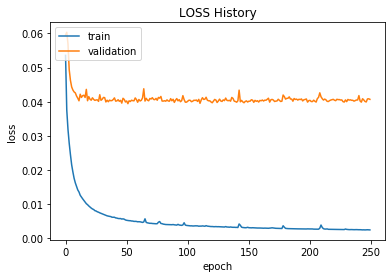

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LOSS History')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(os.path.join(os.getcwd(),'efficientUnet_history.png'))